In [1]:
!pip install umap-learn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\79252\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from scipy import sparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans

In [3]:
RANDOM_STATE = 42

In [4]:
train = sparse.load_npz("train.npz")

In [5]:
train.shape

(14590, 77888)

In [6]:
data = train.toarray()

In [7]:
np.count_nonzero(data)

2026769

In [8]:
data.shape[0]*data.shape[1]

1136385920

In [9]:
np.isnan(data).sum()

0

In [10]:
model_kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init='auto').fit(data)

In [11]:
def kmeans_iter_and_save(data, clusters):
    for i in clusters:
        model_kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init='auto').fit(data)
        result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_kmeans.labels_})
        result_kmeans.set_index('ID', inplace=True)
        result_kmeans.to_csv(f'eval_Kmeans_{i}_clusters.csv')

In [43]:
kmeans_iter_and_save(data,[7,13])

In [38]:
model_kmeans.labels_

array([2, 2, 2, ..., 2, 0, 3])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)

In [14]:
data_pca = pca.fit_transform(data)

In [15]:
data_pca.shape

(14590, 2)

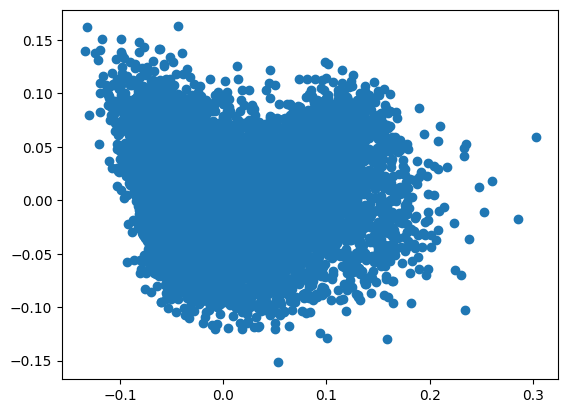

In [16]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])

In [17]:
model_kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init='auto')
model_kmeans.fit(data_pca)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [18]:
model_kmeans.cluster_centers_

array([[-0.0372532 ,  0.03113404],
       [ 0.09005145,  0.01538129],
       [-0.01130874, -0.03069338]])

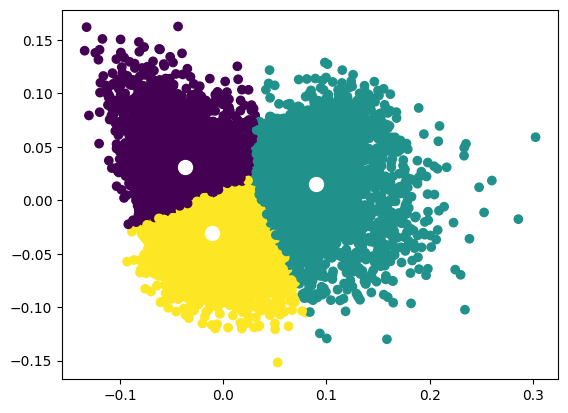

In [19]:

fig, ax = plt.subplots()
ax = plt.scatter( data_pca[:, 0], data_pca[:, 1], c=model_kmeans.labels_)
ax = plt.plot(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1],'wo', markersize=10)

In [157]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_kmeans.labels_})
result_kmeans.set_index('ID', inplace=True)
result_kmeans.to_csv(f'eval_Kmeans_3_clusters_with_PCA.csv')

In [20]:
from sklearn.mixture import GaussianMixture

In [21]:
model_gauss_mix = GaussianMixture(n_components=3,init_params='k-means++', random_state=RANDOM_STATE)

In [22]:
model_gauss_mix.fit(data_pca)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

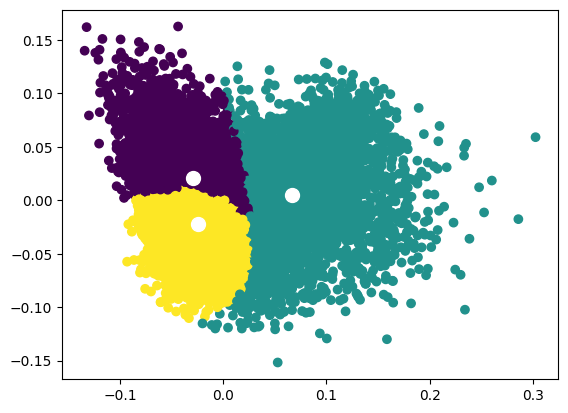

In [160]:

fig, ax = plt.subplots()
ax = plt.scatter( data_pca[:, 0], data_pca[:, 1], c=model_gauss_mix.predict(data_pca))
ax = plt.plot(model_gauss_mix.means_[:,0], model_gauss_mix.means_[:,1],'wo', markersize=10)

In [23]:
model_gauss_mix.predict(data_pca)

array([2, 2, 2, ..., 2, 0, 1], dtype=int64)

In [162]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_gauss_mix.predict(data_pca)})
result_kmeans.set_index('ID', inplace=True)
result_kmeans.to_csv(f'eval_GaussMix_3_clusters_with_PCA.csv')

tsne

In [24]:
from sklearn.manifold import TSNE

In [81]:
N_DIMS_TSNE = 5

In [82]:
data_tsne = TSNE(n_components=N_DIMS_TSNE, random_state=RANDOM_STATE, method='exact').fit_transform(data)

In [91]:
data_tsne

array([[ 29.576902 ,  -5.101284 ,   6.2937784, -10.155455 ],
       [ -9.528343 ,  30.033848 ,   3.8586364, -16.06502  ],
       [  7.213891 ,  15.438202 ,  -6.387587 ,  27.583479 ],
       ...,
       [-27.053652 ,  -2.134506 ,  10.223114 , -11.394755 ],
       [ 16.786724 ,  10.897014 ,  -2.2517934,   8.962038 ],
       [ 17.13895  ,   9.805869 ,   7.434363 ,  -6.026744 ]],
      dtype=float32)

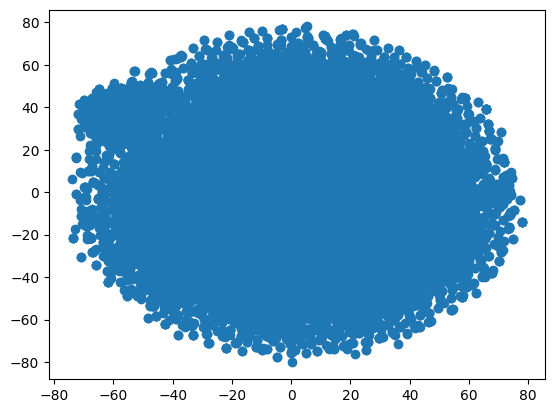

In [ ]:
plt.scatter(data_tsne[:,0], data_tsne[:,1])

In [84]:
model_kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init='auto', init='random')
model_kmeans.fit(data_tsne)

KMeans(init='random', n_clusters=3, n_init='auto', random_state=42)

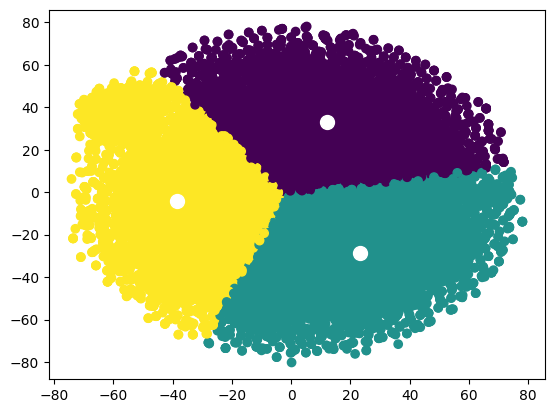

In [29]:

fig, ax = plt.subplots()
ax = plt.scatter( data_tsne[:, 0], data_tsne[:, 1], c=model_kmeans.labels_)
ax = plt.plot(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1],'wo', markersize=10)

In [85]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_kmeans.labels_})
result_kmeans.set_index('ID', inplace=True)
result_kmeans.to_csv(f'eval_Kmeans_3_clusters_with_TSNE_5dims.csv')

In [86]:
data_tsne = TSNE(n_components=4, random_state=RANDOM_STATE, method='exact').fit_transform(data)

In [87]:
model_kmeans_TSNE4dims = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init='auto', init='random')
model_kmeans_TSNE4dims.fit(data_tsne)

KMeans(init='random', n_clusters=3, n_init='auto', random_state=42)

In [89]:
result_kmeans_TSNE4dims = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_kmeans_TSNE4dims.labels_})
result_kmeans_TSNE4dims.set_index('ID', inplace=True)
result_kmeans_TSNE4dims.to_csv(f'eval_Kmeans_3_clusters_with_TSNE_4dims.csv')

array([[ 29.576902 ,  -5.101284 ,   6.2937784, -10.155455 ],
       [ -9.528343 ,  30.033848 ,   3.8586364, -16.06502  ],
       [  7.213891 ,  15.438202 ,  -6.387587 ,  27.583479 ],
       ...,
       [-27.053652 ,  -2.134506 ,  10.223114 , -11.394755 ],
       [ 16.786724 ,  10.897014 ,  -2.2517934,   8.962038 ],
       [ 17.13895  ,   9.805869 ,   7.434363 ,  -6.026744 ]],
      dtype=float32)

In [31]:
model_kmeans.labels_

array([0, 2, 1, ..., 2, 0, 0])

In [32]:
model_gauss_mix = GaussianMixture(n_components=3,init_params='k-means++', random_state=RANDOM_STATE)
model_gauss_mix.fit(data_tsne)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

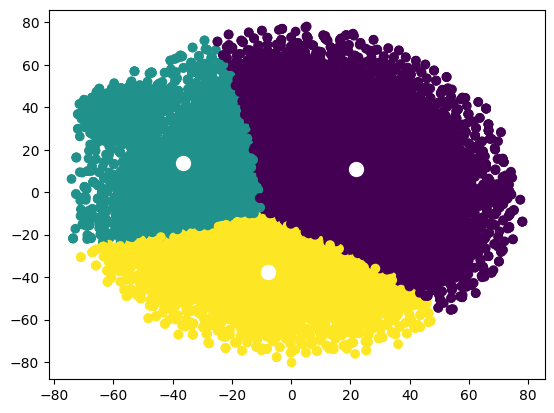

In [33]:
fig, ax = plt.subplots()
ax = plt.scatter( data_tsne[:, 0], data_tsne[:, 1], c=model_gauss_mix.predict(data_tsne))
ax = plt.plot(model_gauss_mix.means_[:,0], model_gauss_mix.means_[:,1],'wo', markersize=10)

In [180]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_gauss_mix.predict(data_tsne)})
result_kmeans.set_index('ID', inplace=True)
result_kmeans.to_csv(f'eval_GaussMix_3_clusters_with_TSNE.csv')

In [34]:
import umap

C:\Users\79252\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
umap_reducer = umap.UMAP()

In [36]:
data_umap = umap_reducer.fit_transform(data)

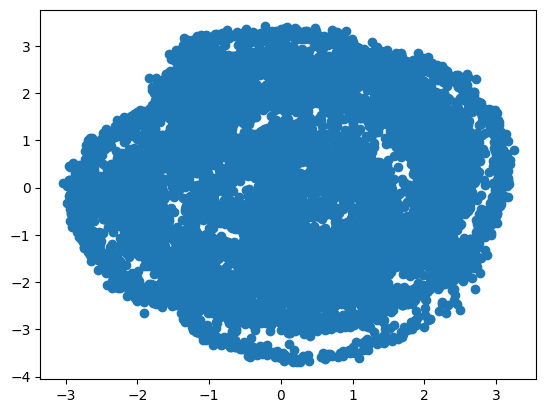

In [37]:

fig, ax = plt.subplots()
ax = plt.scatter( data_umap[:, 0], data_umap[:, 1])


In [38]:
model_kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init='auto')
model_kmeans.fit(data_umap)

KMeans(n_clusters=3, n_init='auto', random_state=42)

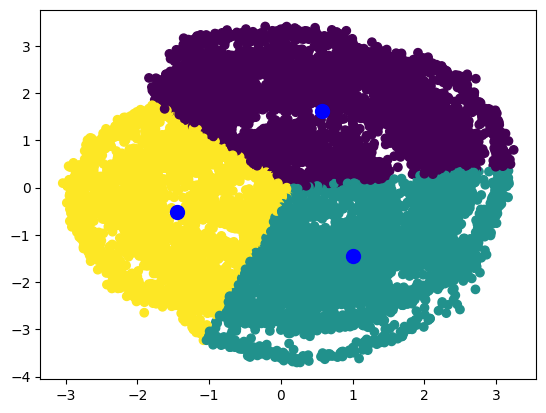

In [39]:
fig, ax = plt.subplots()
ax = plt.scatter( data_umap[:, 0], data_umap[:, 1], c=model_kmeans.labels_)
ax = plt.plot(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1],'bo', markersize=10)

In [40]:
model_kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [191]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_kmeans.labels_})
result_kmeans.set_index('ID', inplace=True)
result_kmeans.to_csv(f'eval_Kmeans_3_clusters_with_UMAP.csv')

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
model_graph_clustering = AgglomerativeClustering(n_clusters=3,linkage='ward')

In [62]:
model_graph_clustering.fit(data_pca)

AgglomerativeClustering(n_clusters=3)

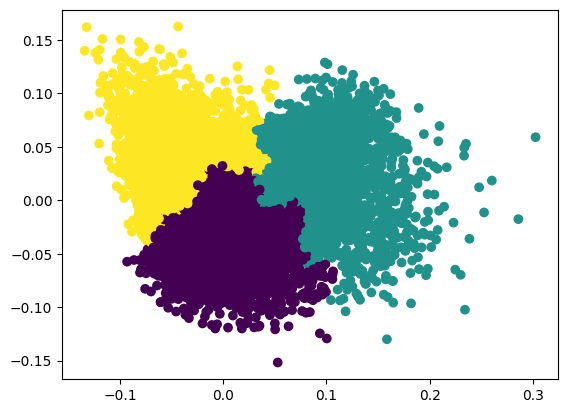

In [63]:
fig, ax = plt.subplots()
ax = plt.scatter( data_pca[:, 0], data_pca[:, 1], c=model_graph_clustering.labels_)


In [64]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_graph_clustering.labels_})
result_kmeans.set_index('ID', inplace=True)
result_kmeans.to_csv(f'eval_GraphClustering_3_clusters_PCA.csv')

In [92]:
model_graph_clustering.fit(data_tsne)

AgglomerativeClustering(n_clusters=3)

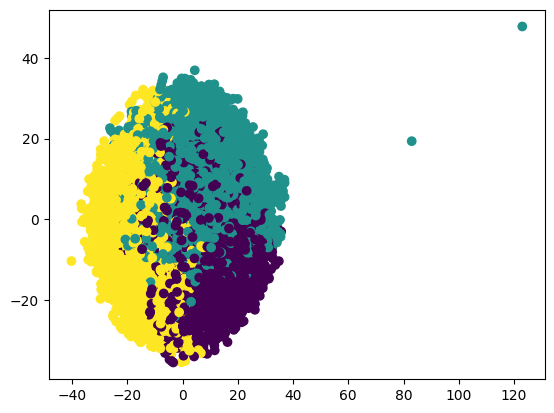

In [94]:
fig, ax = plt.subplots()

ax = plt.scatter( data_tsne[:, 0], data_tsne[:, 2], c=model_graph_clustering.labels_)


In [95]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_graph_clustering.labels_})
result_kmeans.set_index('ID', inplace=True)
result_kmeans.to_csv(f'eval_GraphClustering_3_clusters_TSNE_3dims.csv')

In [68]:
model_graph_clustering.fit(data_umap)

AgglomerativeClustering(n_clusters=3)

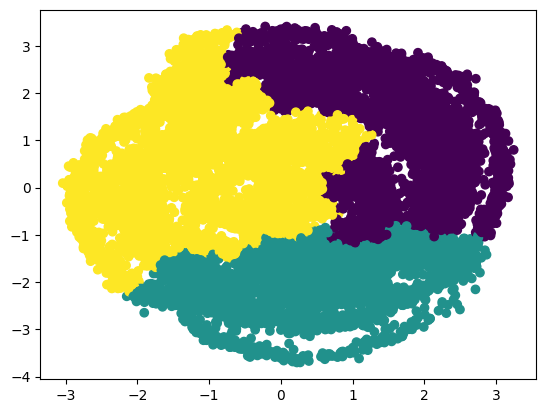

In [69]:
fig, ax = plt.subplots()
ax = plt.scatter( data_umap[:, 0], data_umap[:, 1], c=model_graph_clustering.labels_)


In [70]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_graph_clustering.labels_})
result_kmeans.set_index('ID', inplace=True)
result_kmeans.to_csv(f'eval_GraphClustering_3_clusters_UMAP.csv')